(1.824428361974953e-85+9.231686479465807e-87j)


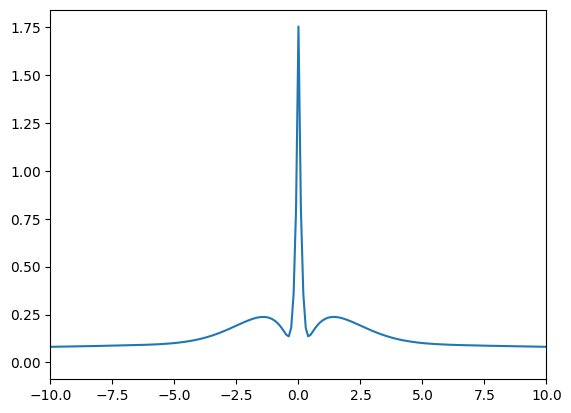

In [3]:
from Solve import psi
import numpy as np
wavefunction, x, t = psi([-200, 4096, -10, 9999])
print(wavefunction[50,50])

import matplotlib.pyplot as plt
plt.plot(x, abs(wavefunction[5000]))
plt.xlim(-10, 10)
plt.show()

In [7]:
from Res_visualisation import *
from Parameters import pars_YanPengPhysRevA_78_033821
from Hydrogen import Hydrogen
from Field import Field

params = pars_YanPengPhysRevA_78_033821()[0]
H = Hydrogen()
F = Field.Pulse(params)
field = F(t, 'Real')
pot = H.potential(x)
plot_HH_spectrum(x, t, wavefunction, params, pot, field, Z=1)
imshow_time_frequency_characteristics(x, t, wavefunction, params, pot, field)

: 